<a href="https://colab.research.google.com/github/rp775/data-science-ipython-notebooks/blob/master/Applying_MCS_in_Finance_Valuing_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valuing a 6-month software development project

# Net Present Value (NPV) method

NPV is used extensively in corporations worldwide to value projects. Once you have forecasted the free cash flows of the project (FCF), you need to discount them back to the present at the appropriate risk adjusted discount rate (R). FCF equals cash from operations minus capital expenditures. The NPV formula is:

NPV = FCF0 + FCF1/(1+R) + FCF2/(1+R)^2 + ...+ FCFn/(1+R)^n



In [0]:
#Import modules
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
#Specify model constants
daily_rate = 400
technology_charges = 1500
overhead_charges = 2000
tax_rate = 0.15

#Specify model uncertainties
n = 1000
fte = npr.uniform(low=4, high=10, size=n)
duration = npr.uniform(low=120, high=240, size=n)
price = npr.normal(loc=100, scale=50, size=n)
units = npr.normal(loc=10000, scale=5000, size=n)
discount_rate = npr.uniform(low=0.06, high=0.10, size=n)

#Specify risk factors and how they affect one another
labor_costs = fte * daily_rate * duration
technology_costs = fte * technology_charges
overhead_costs = fte * overhead_charges
revenues = price * units

#Specify target_value
free_cash_flow = (revenues - labor_costs - technology_costs - overhead_costs) * (1 - tax_rate)

#Simulate projects NPV assuming initial FCF=0
npv = free_cash_flow/(1 + discount_rate)

#Convert numpy array to pandas dataframe for easier analysis
NPV = pd.DataFrame(npv, columns=['NPV'])
NPV.describe()

,NPV
count,1.000000e+03
mean,3.456055e+05
std,5.916339e+05
min,-1.095719e+06
25%,-8.151047e+04
50%,2.572211e+05
75%,6.674782e+05
max,2.773931e+06


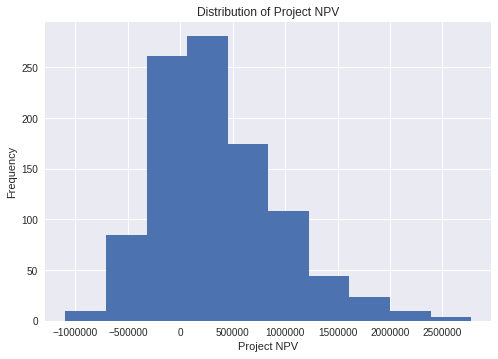

In [0]:
#Plot histogram of NPV distribution
plt.hist(NPV['NPV'], bins=10), plt.title ('Distribution of Project NPV'), plt.xlabel('Project NPV'), plt.ylabel('Frequency'), plt.show();